Epoch 0, Loss: 0.15431337515943885
Epoch 100, Loss: 0.06057958488308338
Epoch 200, Loss: 0.03640589411764123
Epoch 300, Loss: 0.02422620746090649
Epoch 400, Loss: 0.01712408377389921
Epoch 500, Loss: 0.012614763953846978
Epoch 600, Loss: 0.009577833149929021
Epoch 700, Loss: 0.007441515738850858
Epoch 800, Loss: 0.005887577144270638
Epoch 900, Loss: 0.004726889205130623
Training complete!
Updated weights and biases:
Weights Input-Hidden:
 [[ 0.01357746  1.4088615   0.35710189  0.79631173]
 [-0.20494411  0.61414217 -0.31680849  1.06382935]]
Biases Hidden:
 [[-0.36096272  0.45814748 -0.37489208  0.19765322]]
Weights Hidden-Output:
 [[ 0.23381291  0.90898212]
 [-0.44279148  1.22946529]
 [ 0.46945199  0.411463  ]
 [-0.26121817  0.42378996]]
Biases Output:
 [[-0.43705876  0.2402543 ]]


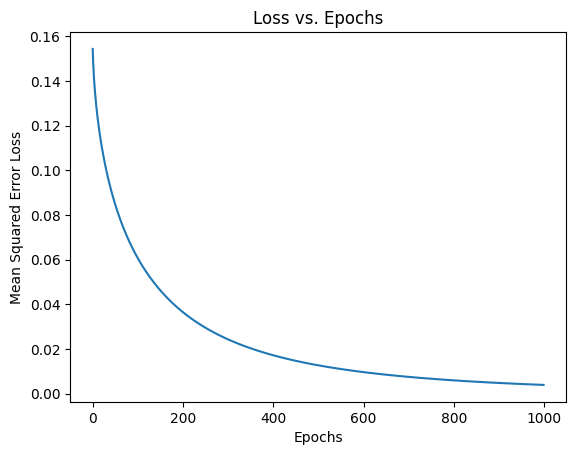

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Function to calculate the output of the neural network
def forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = 1 / (1 + np.exp(-hidden_layer_input))  # Sigmoid activation function
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    predicted_output = 1 / (1 + np.exp(-output_layer_input))  # Sigmoid activation function

    return hidden_layer_output, predicted_output

# Function to calculate the mean squared error loss
def calculate_loss(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)

# Function to perform Adaptive Gradient Descent (Adagrad) optimization
def adagrad_optimizer(X, Y, learning_rate, epsilon, epochs):
    input_size = X.shape[1]
    hidden_size = 4  # You can adjust the number of hidden units
    output_size = Y.shape[1]

    # Initialize parameters
    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize squared gradients
    squared_gradient_weights_input_hidden = np.zeros_like(weights_input_hidden)
    squared_gradient_biases_hidden = np.zeros_like(biases_hidden)
    squared_gradient_weights_hidden_output = np.zeros_like(weights_hidden_output)
    squared_gradient_biases_output = np.zeros_like(biases_output)

    # Store loss for plotting
    losses = []

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_output, predicted_output = forward_propagation(X, weights_input_hidden, biases_hidden, weights_hidden_output, biases_output)

        # Backpropagation
        error = Y - predicted_output
        output_delta = error * (predicted_output * (1 - predicted_output))
        hidden_layer_delta = output_delta.dot(weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

        # Calculate gradients
        gradient_weights_input_hidden = X.T.dot(hidden_layer_delta)
        gradient_biases_hidden = np.sum(hidden_layer_delta, axis=0, keepdims=True)
        gradient_weights_hidden_output = hidden_layer_output.T.dot(output_delta)
        gradient_biases_output = np.sum(output_delta, axis=0, keepdims=True)

        # Update squared gradients
        squared_gradient_weights_input_hidden += gradient_weights_input_hidden**2
        squared_gradient_biases_hidden += gradient_biases_hidden**2
        squared_gradient_weights_hidden_output += gradient_weights_hidden_output**2
        squared_gradient_biases_output += gradient_biases_output**2

        # Update parameters
        weights_input_hidden += learning_rate * gradient_weights_input_hidden / (np.sqrt(squared_gradient_weights_input_hidden) + epsilon)
        biases_hidden += learning_rate * gradient_biases_hidden / (np.sqrt(squared_gradient_biases_hidden) + epsilon)
        weights_hidden_output += learning_rate * gradient_weights_hidden_output / (np.sqrt(squared_gradient_weights_hidden_output) + epsilon)
        biases_output += learning_rate * gradient_biases_output / (np.sqrt(squared_gradient_biases_output) + epsilon)

        # Calculate and store loss for each epoch
        loss = calculate_loss(Y, predicted_output)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    print("Training complete!")

    # Display updated weights and biases
    print("Updated weights and biases:")
    print("Weights Input-Hidden:\n", weights_input_hidden)
    print("Biases Hidden:\n", biases_hidden)
    print("Weights Hidden-Output:\n", weights_hidden_output)
    print("Biases Output:\n", biases_output)

    # Plot loss w.r.t. epoch
    plt.plot(range(epochs), losses)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error Loss')
    plt.title('Loss vs. Epochs')
    plt.show()

# Dataset
X = np.array([[0.5, 2.5]])
Y = np.array([[0.2, 0.9]])

# Hyperparameters
learning_rate = 0.01
epsilon = 1e-8
epochs = 1000

# Perform Adagrad optimization
adagrad_optimizer(X, Y, learning_rate, epsilon, epochs)
